# Hansard Data Exploration

This notebook explores the processed Hansard parliamentary debates dataset.

## Dataset Overview
- **Time Period**: 1803-2005
- **Location**: `data-hansard/processed_fixed/`
- **Structure**: Metadata files by year, content files by debate

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Load Metadata Files

Let's start by exploring the metadata structure for debates.

In [3]:
# Define data paths
data_root = Path('../data-hansard/processed_complete')
metadata_dir = data_root / 'metadata'
content_dir = data_root / 'content'
index_dir = data_root / 'index'

# List available metadata files
metadata_files = sorted(metadata_dir.glob('debates_*.parquet'))
print(f"Found {len(metadata_files)} metadata files")
print(f"\nFirst 5 years:")
for f in metadata_files[:5]:
    print(f"  {f.name}")
print(f"\nLast 5 years:")
for f in metadata_files[-5:]:
    print(f"  {f.name}")

Found 201 metadata files

First 5 years:
  debates_1803.parquet
  debates_1804.parquet
  debates_1805.parquet
  debates_1806.parquet
  debates_1807.parquet

Last 5 years:
  debates_2001.parquet
  debates_2002.parquet
  debates_2003.parquet
  debates_2004.parquet
  debates_2005.parquet


## 2. Load Sample Metadata

Let's load a few years to understand the structure.

In [5]:
# Load metadata for a sample year (1990)
sample_year = 1990
sample_file = metadata_dir / f'debates_{sample_year}.parquet'

if sample_file.exists():
    df_sample = pd.read_parquet(sample_file)
    print(f"Loaded {len(df_sample)} debates from {sample_year}")
    print(f"\nDataFrame shape: {df_sample.shape}")
else:
    print(f"File not found: {sample_file}")

Loaded 9172 debates from 1990

DataFrame shape: (9172, 24)


## 3. Explore Column Structure

In [6]:
# Display all columns and their types
print("Columns in metadata:")
print("="*60)
for col in df_sample.columns:
    print(f"{col:30s} {str(df_sample[col].dtype):15s}")

Columns in metadata:
file_path                      object         
file_name                      object         
file_size                      int64          
file_modified                  object         
content_hash                   object         
extraction_timestamp           object         
title                          object         
success                        bool           
error                          object         
meta_tags                      object         
chamber                        object         
line_count                     int64          
word_count                     int64          
char_count                     int64          
hansard_reference              object         
reference_chamber              object         
reference_date                 object         
reference_volume               int64          
reference_columns              object         
speakers                       object         
speaker_count                  int64   

## 4. View Sample Records

In [7]:
# Display first few rows
print("First 5 debates:")
df_sample.head()

First 5 debates:


,file_path,file_name,file_size,file_modified,content_hash,extraction_timestamp,title,success,error,meta_tags,chamber,line_count,word_count,char_count,hansard_reference,reference_chamber,reference_date,reference_volume,reference_columns,speakers,speaker_count,debate_topic,year,month
0,data-hansard/hansard/1990/jul/25_33_second-homes.html.gz,25_33_second-homes.html.gz,3422,2025-10-29T14:59:18.150879,791904409ebe5995e89710f4adfa4562cebf2f4476bee433be5f5ac6016e8e2a,2025-10-30T10:04:55.832630,"Second Homes (Hansard, 25 July 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,22,262,1441,HC Deb 25 July 1990 vol 177 c458,Commons,25 July 1990,177,458,"[Sir Fergus Montgomery, Mr. Nicholls, Mr. Butler]",3,Second Homes,1990,jul
1,data-hansard/hansard/1990/jul/19_39_new-provisions-in-connection-with.html.gz,19_39_new-provisions-in-connection-with.html.gz,9412,2025-10-29T15:00:35.591463,11b4e828101273a01b1d367825581e6a5d3bc1787558e0f0049356ce45eeec89,2025-10-30T10:04:55.837624,"NEW PROVISIONS IN CONNECTION WITH GOVERNMENT TRADING FUNDS (Hansard, 19 July 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,137,2891,16344,HC Deb 19 July 1990 vol 176 cc1209-14,Commons,19 July 1990,176,1209-14,"[Mr. Speaker, Dr. Marek, Mr. Deputy Speaker, Dr. John Marek, The Economic Secretary to the Treas...",8,NEW PROVISIONS IN CONNECTION WITH GOVERNMENT TRADING FUNDS,1990,jul
2,data-hansard/hansard/1990/jul/24_33_tampons-safety.html.gz,24_33_tampons-safety.html.gz,2672,2025-10-29T15:03:13.245625,2489aeee85f554bdd05b2d6710b0c9956cfa770bef2b04956a2c22e3281a5a06,2025-10-30T10:04:55.839910,"TAMPONS (SAFETY) (Hansard, 24 July 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,4,106,601,HC Deb 24 July 1990 vol 177 c306,Commons,24 July 1990,177,306,[],0,TAMPONS (SAFETY),1990,jul
3,data-hansard/hansard/1990/jul/18_44_finance-bill.html.gz,18_44_finance-bill.html.gz,2365,2025-10-29T14:55:16.310075,44ad1990280a6a97ddbcb29eae2070b2f16d2430492b1fafbb6fb407e892dcc1,2025-10-30T10:04:55.841575,"Finance Bill (Hansard, 18 July 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Lords,4,22,99,HL Deb 18 July 1990 vol 521 c863,Lords,18 July 1990,521,863,[],0,Finance Bill,1990,jul
4,data-hansard/hansard/1990/jul/19_49_clause-22.html.gz,19_49_clause-22.html.gz,2418,2025-10-29T15:00:35.594994,431dba93beda27c66ac4ed6d9e3d9230c79bd22d969b38328f0e33731ca2e233,2025-10-30T10:04:55.843017,"Clause 22 (Hansard, 19 July 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,4,22,128,HC Deb 19 July 1990 vol 176 cc1219-20,Commons,19 July 1990,176,1219-20,[],0,Clause 22,1990,jul


In [8]:
# Display a random sample
print("\nRandom sample of 3 debates:")
df_sample.sample(3)


Random sample of 3 debates:


,file_path,file_name,file_size,file_modified,content_hash,extraction_timestamp,title,success,error,meta_tags,chamber,line_count,word_count,char_count,hansard_reference,reference_chamber,reference_date,reference_volume,reference_columns,speakers,speaker_count,debate_topic,year,month
3364,data-hansard/hansard/1990/mar/22_06_special-constables.html.gz,22_06_special-constables.html.gz,5358,2025-10-29T14:30:50.495593,50271e7122ed1fc44545fdca7e66ca8880120e149e07673470e75c914f966868,2025-10-30T10:04:57.076390,"Special Constables (Hansard, 22 March 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,53,963,5389,HC Deb 22 March 1990 vol 169 cc1220-1,Commons,22 March 1990,169,1220-1,"[Mr. Key, Mr. Sheerman, Mr. Lloyd, Mr. Pawsey, The Parliamentary Under-Secretary of State for th...",9,Special Constables,1990,mar
145,data-hansard/hansard/1990/jul/10_24_estimates-day.html.gz,10_24_estimates-day.html.gz,2750,2025-10-29T14:50:12.266290,22de26ac0c3d0ab542a8692d8001c5c6de6915eee611b1c31a26686213fc4488,2025-10-30T10:04:56.417526,"ESTIMATES DAY (Hansard, 10 July 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,14,38,186,HC Deb 10 July 1990 vol 176 cc188-227,Commons,10 July 1990,176,188-227,[],0,ESTIMATES DAY,1990,jul
7666,data-hansard/hansard/1990/feb/23_00_preamble.html.gz,23_00_preamble.html.gz,2327,2025-07-17T03:24:19.568273,69efd9200c7ebdd90d67ef92068cfc4dfbdf401e495bf5de5156b801c6b120c7,2025-10-30T10:04:55.881617,"Preamble (Hansard, 23 February 1990)",True,None,"{'y_key': '51ff727eff55314a', 'keywords': 'Hansard, House of Commons, House of Lords, Parliament...",Commons,4,17,81,HC Deb 23 February 1990 vol 167 c1173,Commons,23 February 1990,167,1173,[],0,Preamble,1990,feb


## 5. Explore Specific Columns

In [9]:
if 'reference_date' in df_sample.columns:
    # Convert string dates to datetime for proper chronological sorting
    df_sample['reference_date_dt'] = pd.to_datetime(df_sample['reference_date'], format='%d %B %Y')
    print(f"\nDate range: {df_sample['reference_date_dt'].min().strftime('%d %B %Y')} to {df_sample['reference_date_dt'].max().strftime('%d %B %Y')}")
    print(f"Total days covered: {(df_sample['reference_date_dt'].max() - df_sample['reference_date_dt'].min()).days} days")



Date range: 08 January 1990 to 20 December 1990
Total days covered: 346 days


## 6. Check for Missing Values

In [10]:
# Count missing values per column
missing = df_sample.isnull().sum()
missing_pct = 100 * missing / len(df_sample)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Missing values by column:")
print("="*60)
print(missing_df[missing_df['Missing Count'] > 0])

Missing values by column:
       Missing Count  Percentage
error           9172       100.0


## 7. Load Multiple Years

Let's load a few years to see trends over time.

In [11]:
# Load multiple years for comparison
years_to_load = [1900, 1950, 1990, 2000]
dfs = {}

for year in years_to_load:
    file_path = metadata_dir / f'debates_{year}.parquet'
    if file_path.exists():
        dfs[year] = pd.read_parquet(file_path)
        print(f"{year}: {len(dfs[year])} debates")
    else:
        print(f"{year}: File not found")

1900: 13076 debates
1950: 8122 debates
1990: 9172 debates
2000: 9246 debates


## 8. Combine and Analyze

Combine the loaded years and look at overall statistics.

In [12]:
# Combine all loaded dataframes
if dfs:
    df_combined = pd.concat([df.assign(year=year) for year, df in dfs.items()], ignore_index=True)
    print(f"Combined dataset: {len(df_combined)} debates from {len(dfs)} years")
    print(f"\nDebates per year:")
    print(df_combined['year'].value_counts().sort_index())

Combined dataset: 39616 debates from 4 years

Debates per year:
year
1900    13076
1950     8122
1990     9172
2000     9246
Name: count, dtype: int64


## 9. Visualize Debate Counts

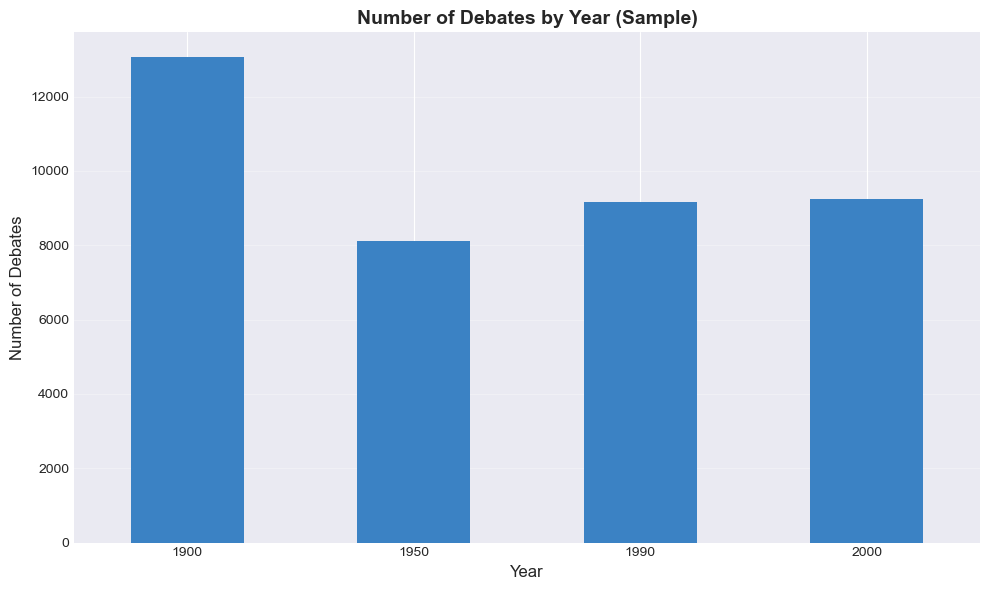

In [13]:
if dfs:
    # Simple bar chart of debate counts
    counts = df_combined['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar', color='#3B82C4')
    plt.title('Number of Debates by Year (Sample)', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Debates', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 10. Inspect Content Files

Content files contain the actual speech text. Let's explore their structure.

In [103]:
# List some content files (JSONL format, organized by year)
import json

content_years = sorted([d.name for d in content_dir.iterdir() if d.is_dir()])[:10]
print(f"Sample content years ({len(content_years)} shown):")
for year in content_years:
    jsonl_file = content_dir / year / f'debates_{year}.jsonl'
    if jsonl_file.exists():
        size_mb = jsonl_file.stat().st_size / (1024 * 1024)
        print(f"  {jsonl_file.name:50s} {size_mb:6.2f} MB")

Sample content years (10 shown):
  debates_1803.jsonl                                   1.92 MB
  debates_1804.jsonl                                   4.34 MB
  debates_1805.jsonl                                  13.52 MB
  debates_1806.jsonl                                  12.47 MB
  debates_1807.jsonl                                  10.45 MB
  debates_1808.jsonl                                  11.99 MB
  debates_1809.jsonl                                  15.54 MB
  debates_1810.jsonl                                   2.93 MB
  debates_1811.jsonl                                  10.86 MB
  debates_1812.jsonl                                  12.19 MB


In [104]:
# Load a sample content file (JSONL format)
sample_content_year = 1990
sample_content_file = content_dir / str(sample_content_year) / f'debates_{sample_content_year}.jsonl'

if sample_content_file.exists():
    # Read JSONL file (each line is a JSON object)
    debates_content = []
    with open(sample_content_file, 'r') as f:
        # Load only first 100 debates for quick exploration
        for i, line in enumerate(f):
            if i >= 100:
                break
            debates_content.append(json.loads(line))
    
    # Convert to DataFrame
    df_content = pd.DataFrame(debates_content)
    print(f"Loaded content file: debates_{sample_content_year}.jsonl (first 100 debates)")
    print(f"Shape: {df_content.shape}")
    print(f"\nColumns:")
    for col in df_content.columns:
        print(f"  {col:30s} {str(df_content[col].dtype):15s}")
    
    print("\nFirst few rows:")
    display(df_content.head())
    
    # Show a sample of the actual text content
    if 'full_text' in df_content.columns:
        print("\n" + "="*60)
        print("Sample debate text (first 500 characters):")
        print("="*60)
        print(df_content['full_text'].iloc[0][:10000] + "...")
else:
    print(f"Content file not found: {sample_content_file}")

Loaded content file: debates_1990.jsonl (first 100 debates)
Shape: (100, 7)

Columns:
  file_path                      object         
  file_name                      object         
  content_hash                   object         
  extraction_timestamp           object         
  lines                          object         
  full_text                      object         
  metadata                       object         

First few rows:


,file_path,file_name,content_hash,extraction_timestamp,lines,full_text,metadata
0,../data/hansard/1990/jul/24_35_poverty-statistics.html.gz,24_35_poverty-statistics.html.gz,b3f60823c8316f48e3948eab0e974fa4d62231ddfe85a1e217484b625c1a10c0,2025-08-03T11:15:18.047301,"[HC Deb 24 July 1990 vol 177 c307, 307, 3.54 pm, §, Mr. Michael Meacher, (Oldham, West), On a po...","HC Deb 24 July 1990 vol 177 c307 307 3.54 pm § Mr. Michael Meacher (Oldham, West) On a point of ...","{'file_path': '../data/hansard/1990/jul/24_35_poverty-statistics.html.gz', 'file_name': '24_35_p..."
1,../data/hansard/1990/jul/16_87_definition-of-local-authority.html.gz,16_87_definition-of-local-authority.html.gz,16ed4847387d7b0165230a8e36c8e6a09a61c84d50d61f406b4ffb6be3997ac4,2025-08-03T11:15:18.049223,"[HC Deb 16 July 1990 vol 176 c820, 820, §, Mr. Nicholas Brown, rose, —, §, Amendment made:, No. ...","HC Deb 16 July 1990 vol 176 c820 820 § Mr. Nicholas Brown rose — § Amendment made: No. 33, in pa...","{'file_path': '../data/hansard/1990/jul/16_87_definition-of-local-authority.html.gz', 'file_name..."
2,../data/hansard/1990/jul/18_03_bird-conservation-exe-estuary.html.gz,18_03_bird-conservation-exe-estuary.html.gz,77d8cba98095794808218f2e9a394c79d5851c1b12deb4a86eb9673aa9ff4461,2025-08-03T11:15:18.052034,"[HL Deb 18 July 1990 vol 521 cc855-6, 855, §, 2.49 p.m., §, Baroness Nicol, asked Her Majesty's ...",HL Deb 18 July 1990 vol 521 cc855-6 855 § 2.49 p.m. § Baroness Nicol asked Her Majesty's Governm...,"{'file_path': '../data/hansard/1990/jul/18_03_bird-conservation-exe-estuary.html.gz', 'file_name..."
3,../data/hansard/1990/jul/19_60_sea-fisheries.html.gz,19_60_sea-fisheries.html.gz,6575e35dc5420f275b294ded58007ffd4f5094094fcd8a2b54080dc8cb3cc9dc,2025-08-03T11:15:18.053979,"[HC Deb 19 July 1990 vol 176 c1277, 1277, §, That the draft Sea Fish Industry Authority (Levy Po...",HC Deb 19 July 1990 vol 176 c1277 1277 § That the draft Sea Fish Industry Authority (Levy Powers...,"{'file_path': '../data/hansard/1990/jul/19_60_sea-fisheries.html.gz', 'file_name': '19_60_sea-fi..."
4,../data/hansard/1990/jul/11_20_british-railways-bill.html.gz,11_20_british-railways-bill.html.gz,717047c7899838050f551f1cc68ce9ad74379ae66d42b0e3491de5cdc7c2b5ed,2025-08-03T11:15:18.055164,"[HL Deb 11 July 1990 vol 521 c422, 422, §, Reported from the Unopposed Bill Committee with amend...",HL Deb 11 July 1990 vol 521 c422 422 § Reported from the Unopposed Bill Committee with amendments.,"{'file_path': '../data/hansard/1990/jul/11_20_british-railways-bill.html.gz', 'file_name': '11_2..."



Sample debate text (first 500 characters):
HC Deb 24 July 1990 vol 177 c307 307 3.54 pm § Mr. Michael Meacher (Oldham, West) On a point of order, Mr. Speaker. Yesterday at about 6.30 in the evening the Government placed in the Press Gallery a copy of the latest poverty figures for which the House has waited more than five years. The figures were sneaked out without reference to the House, without a press conference and without even a single ministerial comment on the press statement. They are sensational figures. They rebut what the Prime Minister said a few moments ago about all sections of the population having gained. They show for the first time that the 10 million people in this country on the lowest incomes— [Interruption.] —were worse off in real terms in 1987 than they were in 1979— § Mr. Speaker Order. What is the point for me? Does the hon. Gentleman think that I can do anything about it? § Mr. Meacher The Minister has so far refused to come to the House, and I am raising th

In [14]:
# Examine the difference between 'lines' and 'full_text'
if len(debates_content) > 0:
    sample = debates_content[0]
    
    print("DIFFERENCE BETWEEN 'lines' AND 'full_text'")
    print("="*60)
    
    # Show the lines structure
    lines = sample['lines']
    print(f"\n'lines' field:")
    print(f"  Type: {type(lines)}")
    print(f"  Number of lines: {len(lines)}")
    print(f"\n  First 10 lines:")
    for i, line in enumerate(lines[:10], 1):
        print(f"    {i:2d}. {line}")
    
    # Show the full_text structure
    full_text = sample['full_text']
    print(f"\n'full_text' field:")
    print(f"  Type: {type(full_text)}")
    print(f"  Length: {len(full_text)} characters")
    print(f"\n  First 500 characters:")
    print(f"  {full_text[:500]}...")
    
    # Show they're related
    print("\n" + "="*60)
    print("Relationship:")
    print("="*60)
    joined_lines = ' '.join(lines)
    print(f"  Lines joined together: {len(joined_lines)} chars")
    print(f"  Full text length:      {len(full_text)} chars")
    print(f"  Are they the same?     {joined_lines == full_text}")
    
    # Show what lines preserve that full_text doesn't
    print("\n" + "="*60)
    print("What 'lines' preserves:")
    print("="*60)
    print("  - Original segmentation from HTML parsing")
    print("  - Easier to identify speakers (they're usually separate lines)")
    print("  - Easier to identify timestamps and references")
    print("  - Better for extracting structured data")
    
    print("\nWhat 'full_text' is good for:")
    print("="*60)
    print("  - Full-text search")
    print("  - NLP analysis (word counts, sentiment, topics)")
    print("  - Text generation / summarization")
    print("  - Simpler to work with when structure doesn't matter")

DIFFERENCE BETWEEN 'lines' AND 'full_text'

'lines' field:
  Type: <class 'list'>
  Number of lines: 19

  First 10 lines:
     1. HC Deb 24 July 1990 vol 177 c307
     2. 307
     3. 3.54 pm
     4. §
     5. Mr. Michael Meacher
     6. (Oldham, West)
     7. On a point of order, Mr. Speaker. Yesterday at about 6.30 in the evening the Government placed in the Press Gallery a copy of the latest poverty figures for which the House has waited more than five years. The figures were sneaked out without reference to the House, without a press conference and without even a single ministerial comment on the press statement.
     8. They are sensational figures. They rebut what the Prime Minister said a few moments ago about all sections of the population having gained. They show for the first time that the 10 million people in this country on the lowest incomes—
     9. [Interruption.]
    10. —were worse off in real terms in 1987 than they were in 1979—

'full_text' field:
  Type: <class 'st

## Summary

This notebook provides an initial exploration of the Hansard processed dataset:
- Loaded metadata and content files
- Examined column structure and data types
- Checked for missing values
- Visualized basic statistics

Next steps could include:
- Load the enhanced gender dataset
- Analyze speech patterns
- Explore temporal trends
- Join metadata with content for full text analysis

## 11. Gender Analysis Audit

Let's audit the gender identification process step-by-step.

In [15]:
import ast
def parse_speakers(speaker_array):
    """Parse speaker array to list"""
    # Handle None or NaN
    if speaker_array is None:
        return []
    
    # If it's already a list, return it
    if isinstance(speaker_array, list):
        return speaker_array
    
    # Handle numpy arrays (this is the actual case!)
    if isinstance(speaker_array, np.ndarray):
        return speaker_array.tolist()
    
    # Handle NaN values (float)
    if isinstance(speaker_array, float):
        if np.isnan(speaker_array):
            return []
    
    # Handle string representations (just in case)
    if isinstance(speaker_array, str):
        if speaker_array == '[]' or speaker_array == '':
            return []
        try:
            return ast.literal_eval(speaker_array)
        except:
            return []
    
    # Default: return empty list
    return []

# Extract all speakers (convert numpy arrays to lists)
df_sample['speakers_list'] = df_sample['speakers'].apply(parse_speakers)

# Count total speakers
total_speakers = df_sample['speakers_list'].apply(len).sum()
debates_with_speakers = (df_sample['speakers_list'].apply(len) > 0).sum()

print(f"Dataset: {len(df_sample)} debates from {sample_year}")
print(f"Debates with speakers: {debates_with_speakers} ({100*debates_with_speakers/len(df_sample):.1f}%)")
print(f"Total speaker mentions: {total_speakers}")
print(f"Average speakers per debate: {total_speakers/len(df_sample):.1f}")

# Show distribution
print("\nSpeaker count distribution:")
speaker_counts = df_sample['speakers_list'].apply(len)
print(speaker_counts.value_counts().head(10).sort_index())


Dataset: 6792 debates from 1990
Debates with speakers: 4184 (61.6%)
Total speaker mentions: 32726
Average speakers per debate: 4.8

Speaker count distribution:
speakers_list
0    2608
1     750
2     331
3     424
4     475
5     439
6     360
7     246
8     188
9     125
Name: count, dtype: int64


In [106]:
no_speakers = df_sample[df_sample['speakers_list'].apply(len) == 0]
print(f"Debates with no speakers: {len(no_speakers)}")
print(f"\nSample titles of debates with no speakers:")
for i, row in no_speakers.head(10).iterrows():
    print(f"  - {row['debate_topic']}")

print(f"\nSample titles of debates WITH speakers:")
with_speakers = df_sample[df_sample['speakers_list'].apply(len) > 0]
for i, row in with_speakers.head(10).iterrows():
    speakers_str = ', '.join(row['speakers_list'][:3])
    if len(row['speakers_list']) > 3:
        speakers_str += f" (+{len(row['speakers_list'])-3} more)"
    print(f"  - {row['debate_topic']}: {speakers_str}")


Debates with no speakers: 2608

Sample titles of debates with no speakers:
  - SEA FISHERIES
  - British Railways Bill
  - Oral Answers to Questions
  - MINISTERIAL AND OTHER OFFICES (PENSIONS AND SALARIES):
  - Consolidated Fund (Appropriation) Bill
  - Great Yarmouth Port Authority Bill [H.L.]
  - Lord Porter of Luddenham
  - FOREIGN AND COMMONWEALTH AFFAIRS
  - FOREIGN AFFAIRS
  - OMBUDSMAN'S FUNCTIONS

Sample titles of debates WITH speakers:
  - Poverty Statistics: Mr. Meacher, Mr. Michael Meacher, Mr. Speaker
  - DEFINITION OF "LOCAL AUTHORITY": Mr. Nicholas Brown
  - Bird Conservation: Exe Estuary: Baroness Nicol, Lord Williams of Elvel, Lord Hesketh (+3 more)
  - Stolen Antiquities: Illegal Movements: Viscount Hanworth, Lord Jenkins of Putney, Baroness Birk (+5 more)
  - SOUTHAMPTON RAPID TRANSIT BILL [LORDS]: Hon. Members
  - Family Practitioner Services: Mr. Coleman, Mr. Grist
  - Departmental Expenditure: Mr. David Shaw, Mr. Cousins, Mr. Franks (+1 more)
  - EC Industry Minis

In [107]:
# First, let's inspect the speakers column
print("Inspecting 'speakers' column:")
print("="*60)
print(f"Column type: {df_sample['speakers'].dtype}")
print(f"Total rows: {len(df_sample)}")
print(f"Non-null rows: {df_sample['speakers'].notna().sum()}")
print(f"\nFirst 10 values:")
for i in range(min(10, len(df_sample))):
    val = df_sample['speakers'].iloc[i]
    print(f"{i}: Type={type(val).__name__:15s} Value={repr(val)[:80]}")

# Check if all are empty lists
print(f"\nSample of unique values:")
print(df_sample['speakers'].value_counts().head(10))


Inspecting 'speakers' column:
Column type: object
Total rows: 6792
Non-null rows: 6792

First 10 values:
0: Type=ndarray         Value=array(['Mr. Meacher', 'Mr. Michael Meacher', 'Mr. Speaker'], dtype=object)
1: Type=ndarray         Value=array(['Mr. Nicholas Brown'], dtype=object)
2: Type=ndarray         Value=array(['Baroness Nicol', 'Lord Williams of Elvel', 'Lord Hesketh',
       'Lore 
3: Type=ndarray         Value=array([], dtype=object)
4: Type=ndarray         Value=array([], dtype=object)
5: Type=ndarray         Value=array(['Viscount Hanworth', 'Lord Jenkins of Putney', 'Baroness Birk',
       'V
6: Type=ndarray         Value=array(['Hon. Members'], dtype=object)
7: Type=ndarray         Value=array(['Mr. Coleman', 'Mr. Grist'], dtype=object)
8: Type=ndarray         Value=array(['Mr. David Shaw', 'Mr. Cousins', 'Mr. Franks', 'Mr. Lilley'],
      dtype
9: Type=ndarray         Value=array([], dtype=object)

Sample of unique values:
speakers
[The Lord Chancellor]                 

In [16]:
### Step 2: Get unique speakers and examine their format

# Flatten all speakers into a single list
all_speakers = []
for speakers in df_sample['speakers_list']:
    all_speakers.extend(speakers)

unique_speakers = list(set(all_speakers))
print(f"Unique speakers: {len(unique_speakers)}")
print(f"\nSample of speaker names (first 20):")
for i, speaker in enumerate(sorted(unique_speakers)[:20], 1):
    print(f"{i:3d}. {speaker}")

# Analyze speaker name patterns
print("\n" + "="*60)
print("Speaker name patterns:")
print("="*60)

# Count by title/prefix patterns
with_mr = sum(1 for s in unique_speakers if 'MR.' in s.upper())
with_lord = sum(1 for s in unique_speakers if 'LORD' in s.upper())
with_sir = sum(1 for s in unique_speakers if 'SIR' in s.upper())
with_earl = sum(1 for s in unique_speakers if 'EARL' in s.upper())
with_viscount = sum(1 for s in unique_speakers if 'VISCOUNT' in s.upper())

print(f"Containing 'Mr.':      {with_mr:4d} ({100*with_mr/len(unique_speakers):.1f}%)")
print(f"Containing 'Lord':    {with_lord:4d} ({100*with_lord/len(unique_speakers):.1f}%)")
print(f"Containing 'Sir':     {with_sir:4d} ({100*with_sir/len(unique_speakers):.1f}%)")
print(f"Containing 'Earl':    {with_earl:4d} ({100*with_earl/len(unique_speakers):.1f}%)")
print(f"Containing 'Viscount': {with_viscount:4d} ({100*with_viscount/len(unique_speakers):.1f}%)")

Unique speakers: 2379

Sample of speaker names (first 20):
  1. "Mr. Dalyell
  2. (Mr. Atkins)
  3. . Mr. Colvin
  4. . Mr. Ernie Ross
  5. . Mr. Home Robertson
  6. . Mr. Kirkwood
  7. . Mr. Robert Hughes
  8. . Mrs. Margaret Ewing
  9. . Sir Russell Johnston
 10. 1. Mr. Battle
 11. 12. Mr. Harry Greenway
 12. 79. Mr. Harry Greenway
 13. A Noble Lord
 14. A noble Lord
 15. A noble and learned Lord
 16. Adley
 17. An Hon. Member
 18. Bareness Blackstone
 19. Bareness Darcy (de Knayth)
 20. Bareness Nicol

Speaker name patterns:
Containing 'Mr.':      1312 (55.1%)
Containing 'Lord':     511 (21.5%)
Containing 'Sir':       83 (3.5%)
Containing 'Earl':      72 (3.0%)
Containing 'Viscount':   37 (1.6%)


In [17]:
### Step 3: Load gender wordlists

# Load the gender wordlists
female_words_path = Path('../data-hansard/gender_wordlists/female_words.txt')
male_words_path = Path('../data-hansard/gender_wordlists/male_words.txt')

female_words = set()
male_words = set()

with open(female_words_path, 'r') as f:
    female_words = set(line.strip().lower() for line in f if line.strip())

with open(male_words_path, 'r') as f:
    male_words = set(line.strip().lower() for line in f if line.strip())

print(f"Female gendered words: {len(female_words)}")
print(f"Male gendered words: {len(male_words)}")

print(f"\nSample female words:")
print(sorted(list(female_words))[:20])

print(f"\nSample male words:")
print(sorted(list(male_words))[:20])

# Check for overlap
overlap = female_words & male_words

if overlap:
    print(f"\nWARNING: {len(overlap)} words appear in both lists:")
    print(sorted(overlap))
else:
    print(f"\nGOOD: No words appear in both lists:")
    # print(sorted(overlap))



Female gendered words: 202
Male gendered words: 207

Sample female words:
['abbess', 'abbesses', 'actress', 'actresses', 'adultress', 'adultresses', 'airwoman', 'airwomen', 'aunt', 'aunts', 'bachelorette', 'ballerina', 'barnoesses', 'baroness', 'barwoman', 'barwomen', 'belle', 'belles', 'bellgirl', 'bellgirls']

Sample male words:
['abbot', 'abbots', 'actor', 'actors', 'adultor', 'adultors', 'airman', 'airmen', 'androgen', 'andrology', 'andropause', 'bachelor', 'bachelors', 'ballet_dancer', 'barbershop', 'baritone', 'barman', 'barmen', 'baron', 'barons']

GOOD: No words appear in both lists:


In [18]:
### Step 4: Simple title-based gender detection

def detect_gender_by_title(speaker_name):
    """
    Detect gender based on common titles/honorifics.
    Returns: 'male', 'female', or 'unknown'
    """
    name_upper = speaker_name.upper()
    
    # Female titles
    female_titles = ['MRS.', 'MISS', 'MS.', 'LADY', 'DAME', 'BARONESS', 
                     'COUNTESS', 'DUCHESS', 'MARCHIONESS', 'VISCOUNTESS']
    
    # Male titles
    male_titles = ['MR.', 'SIR', 'LORD', 'DUKE', 'EARL', 'BARON', 
                   'VISCOUNT', 'MARQUESS', 'COUNT', 'PRINCE']
    
    for title in female_titles:
        if title in name_upper:
            return 'female'
    
    for title in male_titles:
        if title in name_upper:
            return 'male'
    
    return 'unknown'

# Apply gender detection to unique speakers
speaker_genders = {}
for speaker in unique_speakers:
    speaker_genders[speaker] = detect_gender_by_title(speaker)

# Count results
gender_counts = pd.Series(speaker_genders).value_counts()

print("Gender detection by title:")
print("="*60)
for gender, count in gender_counts.items():
    pct = 100 * count / len(unique_speakers)
    print(f"{gender:10s}: {count:4d} ({pct:5.1f}%)")

# Show some examples
print("\nSample male speakers:")
male_speakers = [s for s, g in speaker_genders.items() if g == 'male']
for speaker in sorted(male_speakers)[:10]:
    print(f"  {speaker}")

print("\nSample female speakers:")
female_speakers = [s for s, g in speaker_genders.items() if g == 'female']
for speaker in sorted(female_speakers)[:10]:
    print(f"  {speaker}")

print("\nSample unknown speakers:")
unknown_speakers = [s for s, g in speaker_genders.items() if g == 'unknown']
for speaker in sorted(unknown_speakers)[:10]:
    print(f"  {speaker}")

Gender detection by title:
male      : 1996 ( 83.9%)
female    :  195 (  8.2%)
unknown   :  188 (  7.9%)

Sample male speakers:
  "Mr. Dalyell
  (Mr. Atkins)
  . Mr. Colvin
  . Mr. Ernie Ross
  . Mr. Home Robertson
  . Mr. Kirkwood
  . Mr. Robert Hughes
  . Sir Russell Johnston
  1. Mr. Battle
  12. Mr. Harry Greenway

Sample female speakers:
  . Mrs. Margaret Ewing
  Baroness Birk
  Baroness Blackstone
  Baroness Blatch
  Baroness Blotch
  Baroness Brigstocke
  Baroness Burton of Coventry
  Baroness Carnegy of Lour
  Baroness Castle of Blackburn
  Baroness Cox

Sample unknown speakers:
  Adley
  An Hon. Member
  Bareness Blackstone
  Bareness Darcy (de Knayth)
  Bareness Nicol
  Bareness Seear
  Baroiuss Elliot of Harwood
  Baroress Strange
  Barroness Blatch
  Brian Sedgemore


In [19]:
### Step 7: Quality checks and anomaly detection

print("QUALITY CHECKS FOR 1900 DATA")
print("="*60)

# 1. Check for debates with speakers but no word count
print("\n1. Debates WITH speakers but ZERO word count:")
with_speakers = df_sample[df_sample['speakers_list'].apply(len) > 0]
zero_words = with_speakers[with_speakers['word_count'] == 0]
print(f"   Found: {len(zero_words)} debates")
if len(zero_words) > 0:
    print("   WARNING: These debates have speakers but no text!")
    for i, row in zero_words.head(3).iterrows():
        print(f"     - {row['debate_topic']}: {len(row['speakers_list'])} speakers, {row['word_count']} words")

# 2. Check for very short debates with many speakers
print("\n2. Debates with many speakers (>5) but few words (<100):")
many_speakers = df_sample[df_sample['speakers_list'].apply(len) > 5]
short_text = many_speakers[many_speakers['word_count'] < 100]
print(f"   Found: {len(short_text)} debates")
if len(short_text) > 0:
    print("   WARNING: These might be data extraction issues!")
    for i, row in short_text.head(3).iterrows():
        print(f"     - {row['debate_topic']}: {len(row['speakers_list'])} speakers, {row['word_count']} words")

# 3. Check speaker name consistency
print("\n3. Speaker name pattern analysis:")
all_speaker_names = []
for speakers in df_sample['speakers_list']:
    all_speaker_names.extend(speakers)

# Check for unusual patterns
empty_names = sum(1 for s in all_speaker_names if s == '')
very_short = sum(1 for s in all_speaker_names if len(s) < 3)
very_long = sum(1 for s in all_speaker_names if len(s) > 100)

print(f"   Empty speaker names: {empty_names}")
print(f"   Very short names (<3 chars): {very_short}")
print(f"   Very long names (>100 chars): {very_long}")

if very_long > 0:
    print("   WARNING: Found unusually long speaker names:")
    long_names = [s for s in all_speaker_names if len(s) > 100]
    for name in long_names[:3]:
        print(f"     - {name[:100]}...")

# 4. Check for duplicate speakers within same debate
print("\n4. Debates with duplicate speaker entries:")
debates_with_dupes = 0
for i, row in df_sample.iterrows():
    speakers = row['speakers_list']
    if len(speakers) != len(set(speakers)):
        debates_with_dupes += 1

print(f"   Found: {debates_with_dupes} debates ({100*debates_with_dupes/len(df_sample):.1f}%)")
if debates_with_dupes > 0:
    print("   NOTE: Same speaker appearing multiple times in one debate (normal for back-and-forth)")

# 5. Check date consistency
print("\n5. Date consistency check:")
df_sample['parsed_date'] = pd.to_datetime(df_sample['reference_date'], format='%d %B %Y', errors='coerce')
invalid_dates = df_sample['parsed_date'].isna().sum()
print(f"   Invalid/unparseable dates: {invalid_dates}")

if invalid_dates == 0:
    date_range = (df_sample['parsed_date'].max() - df_sample['parsed_date'].min()).days
    print(f"   Date range: {df_sample['parsed_date'].min().strftime('%Y-%m-%d')} to {df_sample['parsed_date'].max().strftime('%Y-%m-%d')}")
    print(f"   Span: {date_range} days")
    
    # Check if all dates are in 1857
    wrong_year = df_sample[df_sample['parsed_date'].dt.year != sample_year]
    if len(wrong_year) > 0:
        print(f"   WARNING: {len(wrong_year)} debates have dates NOT in {sample_year}!")
        print(wrong_year[['reference_date', 'debate_topic']].head())

# 6. Chamber distribution
print("\n6. Chamber distribution:")
print(df_sample['chamber'].value_counts())

print("\n" + "="*60)
print("OVERALL ASSESSMENT:")
print("="*60)
issues = []
if len(zero_words) > 0:
    issues.append(f"{len(zero_words)} debates with speakers but no text")
if len(short_text) > 0:
    issues.append(f"{len(short_text)} short debates with many speakers")
if very_long > 0:
    issues.append(f"{very_long} unusually long speaker names")
if invalid_dates > 0:
    issues.append(f"{invalid_dates} invalid dates")

if issues:
    print("ISSUES FOUND:")
    for issue in issues:
        print(f"  ⚠ {issue}")
else:
    print("✓ No major data quality issues detected")

QUALITY CHECKS FOR 1900 DATA

1. Debates WITH speakers but ZERO word count:
   Found: 0 debates

2. Debates with many speakers (>5) but few words (<100):
   Found: 0 debates

3. Speaker name pattern analysis:
   Empty speaker names: 0
   Very short names (<3 chars): 0
   Very long names (>100 chars): 16
     - The Parliamentary Under-Secretary of State for Foreign and Commonwealth Affairs (Mr. Mark Lennox-Boy...
     - The Parliamentary Under-Secretary of State for Foreign and Commonwealth Affairs (Mr. Mark Lennox-Boy...
     - The Parliamentary Under-Secretary of State for Foreign and Commonwealth Affairs (Mr. Mark Lennox-Boy...

4. Debates with duplicate speaker entries:
   Found: 0 debates (0.0%)

5. Date consistency check:
   Invalid/unparseable dates: 0
   Date range: 1990-01-10 to 1990-12-20
   Span: 344 days

6. Chamber distribution:
chamber
Commons    5095
Lords      1697
Name: count, dtype: int64

OVERALL ASSESSMENT:
ISSUES FOUND:
  ⚠ 16 unusually long speaker names


In [20]:
### Step 8: Review gender detection accuracy

print("GENDER DETECTION REVIEW")
print("="*60)

# Re-apply gender detection to see full results
from collections import Counter

def detect_gender_by_title(speaker_name):
    """Detect gender based on common titles/honorifics"""
    name_upper = speaker_name.upper()
    
    # Female titles
    female_titles = ['MRS.', 'MISS', 'MS.', 'LADY', 'DAME', 'BARONESS', 
                     'COUNTESS', 'DUCHESS', 'MARCHIONESS', 'VISCOUNTESS']
    
    # Male titles  
    male_titles = ['MR.', 'SIR', 'LORD', 'DUKE', 'EARL', 'BARON', 
                   'VISCOUNT', 'MARQUESS', 'COUNT', 'PRINCE', 'KING']
    
    for title in female_titles:
        if title in name_upper:
            return 'female'
    
    for title in male_titles:
        if title in name_upper:
            return 'male'
    
    return 'unknown'

# Get all unique speakers
all_speakers = []
for speakers in df_sample['speakers_list']:
    all_speakers.extend(speakers)

unique_speakers = list(set(all_speakers))
speaker_counts = Counter(all_speakers)

# Apply gender detection
speaker_genders = {s: detect_gender_by_title(s) for s in unique_speakers}

# Create summary
gender_dist = Counter(speaker_genders.values())
print(f"\n1. Gender distribution (unique speakers):")
for gender in ['male', 'female', 'unknown']:
    count = gender_dist.get(gender, 0)
    pct = 100 * count / len(unique_speakers) if len(unique_speakers) > 0 else 0
    print(f"   {gender:10s}: {count:4d} ({pct:5.1f}%)")

# By total mentions
print(f"\n2. Gender distribution (by mentions/appearances):")
mentions_by_gender = {'male': 0, 'female': 0, 'unknown': 0}
for speaker, count in speaker_counts.items():
    gender = speaker_genders[speaker]
    mentions_by_gender[gender] += count

total_mentions = sum(mentions_by_gender.values())
for gender in ['male', 'female', 'unknown']:
    count = mentions_by_gender[gender]
    pct = 100 * count / total_mentions if total_mentions > 0 else 0
    print(f"   {gender:10s}: {count:5d} mentions ({pct:5.1f}%)")

# Historical context check
print(f"\n3. Historical context check (1857):")
print(f"   First female MP elected: 1918 (Nancy Astor, seat taken 1919)")
print(f"   Expected female MPs in 1857: 0")
print(f"   Detected female speakers: {gender_dist.get('female', 0)}")

if gender_dist.get('female', 0) > 0:
    print(f"\n   ⚠ WARNING: Found {gender_dist.get('female', 0)} female speakers in {sample_year}!")
    print("   These might be:")
    print("     - Peeresses in House of Lords")
    print("     - Misclassified speakers")
    print("     - Witnesses/petitioners (not MPs)")
    
    female_speakers = [s for s, g in speaker_genders.items() if g == 'female']
    print(f"\n   Female speakers found:")
    for speaker in sorted(female_speakers):
        print(f"     - {speaker} (mentioned {speaker_counts[speaker]} times)")

# Check unknown speakers more carefully
print(f"\n4. Unknown speakers analysis:")
unknown_speakers = [s for s, g in speaker_genders.items() if g == 'unknown']
print(f"   Total unknown: {len(unknown_speakers)}")

if len(unknown_speakers) > 0:
    print(f"\n   Most frequent unknown speakers:")
    unknown_by_freq = sorted([(speaker_counts[s], s) for s in unknown_speakers], reverse=True)
    for count, speaker in unknown_by_freq[:10]:
        print(f"     {count:3d}x - {speaker}")
    
    # Check patterns in unknown speakers
    print(f"\n   Patterns in unknown speakers:")
    with_the = sum(1 for s in unknown_speakers if s.startswith('THE ') or s.startswith('The '))
    all_caps = sum(1 for s in unknown_speakers if s.isupper())
    has_comma = sum(1 for s in unknown_speakers if ',' in s)
    
    print(f"     Starting with 'THE': {with_the} ({100*with_the/len(unknown_speakers):.1f}%)")
    print(f"     All capitals: {all_caps} ({100*all_caps/len(unknown_speakers):.1f}%)")
    print(f"     Contains comma: {has_comma} ({100*has_comma/len(unknown_speakers):.1f}%)")

print("\n" + "="*60)

GENDER DETECTION REVIEW

1. Gender distribution (unique speakers):
   male      : 1997 ( 83.9%)
   female    :  195 (  8.2%)
   unknown   :  187 (  7.9%)

2. Gender distribution (by mentions/appearances):
   male      : 28228 mentions ( 86.3%)
   female    :  2935 mentions (  9.0%)
   unknown   :  1563 mentions (  4.8%)

3. Historical context check (1857):
   First female MP elected: 1918 (Nancy Astor, seat taken 1919)
   Expected female MPs in 1857: 0
   Detected female speakers: 195

   ⚠ WARNING: Found 195 female speakers in 1990!
   These might be:
     - Peeresses in House of Lords
     - Misclassified speakers
     - Witnesses/petitioners (not MPs)

   Female speakers found:
     - . Mrs. Margaret Ewing (mentioned 1 times)
     - Baroness Birk (mentioned 29 times)
     - Baroness Blackstone (mentioned 37 times)
     - Baroness Blatch (mentioned 116 times)
     - Baroness Blotch (mentioned 3 times)
     - Baroness Brigstocke (mentioned 1 times)
     - Baroness Burton of Coventry (

In [21]:
### Step 5: Compare with existing enhanced dataset

# Load the existing enhanced dataset for the same year
enhanced_path = Path(f'../data-hansard/gender_analysis_enhanced/debates_{sample_year}_enhanced.parquet')

if enhanced_path.exists():
    df_enhanced = pd.read_parquet(enhanced_path)
    print(f"Loaded enhanced dataset: {len(df_enhanced)} debates")
    print(f"\nGender-related columns:")
    gender_cols = ['has_female', 'has_male', 'female_mps', 'male_mps', 
                   'female_names', 'male_names', 'gender_ratio', 
                   'confirmed_mps', 'ambiguous_speakers', 'unmatched_speakers']
    for col in gender_cols:
        if col in df_enhanced.columns:
            print(f"  ✓ {col}")
    
    # Summary statistics
    print("\n" + "="*60)
    print("Enhanced dataset gender statistics:")
    print("="*60)
    print(f"Debates with female speakers: {df_enhanced['has_female'].sum()} ({100*df_enhanced['has_female'].mean():.1f}%)")
    print(f"Debates with male speakers:   {df_enhanced['has_male'].sum()} ({100*df_enhanced['has_male'].mean():.1f}%)")
    print(f"Total female MP mentions:     {df_enhanced['female_mps'].sum()}")
    print(f"Total male MP mentions:       {df_enhanced['male_mps'].sum()}")
    
    # Examine a debate with identified speakers
    female_debates = df_enhanced[df_enhanced['has_female'] == True]
    if len(female_debates) > 0:
        print("\n" + "="*60)
        print("Example debate WITH female speakers:")
        print("="*60)
        sample_debate = female_debates.iloc[0]
        print(f"Title: {sample_debate['title']}")
        print(f"Date: {sample_debate['reference_date']}")
        print(f"Female MPs: {sample_debate['female_mps']}")
        print(f"Male MPs: {sample_debate['male_mps']}")
        print(f"Female names: {sample_debate['female_names']}")
        print(f"Male names: {sample_debate['male_names']}")
    else:
        print(f"\nNo female speakers found in {sample_year}")
else:
    print(f"Enhanced dataset not found: {enhanced_path}")

Loaded enhanced dataset: 2576 debates

Gender-related columns:
  ✓ has_female
  ✓ has_male
  ✓ female_mps
  ✓ male_mps
  ✓ female_names
  ✓ male_names
  ✓ gender_ratio
  ✓ confirmed_mps
  ✓ ambiguous_speakers
  ✓ unmatched_speakers

Enhanced dataset gender statistics:
Debates with female speakers: 577 (22.4%)
Debates with male speakers:   2538 (98.5%)
Total female MP mentions:     1091
Total male MP mentions:       16212

Example debate WITH female speakers:
Title: Policing in London (Hansard, 13 July 1990)
Date: 13 July 1990
Female MPs: 4
Male MPs: 17
Female names: ['Kate Hoey' 'Teresa Gorman' 'Teresa Gorman' 'Kate Hoey']
Male names: ['Ron Leighton' 'Michael Shersby' 'Jeremy Corbyn' 'John Wheeler'
 'Robert Maclennan' 'Roy Hattersley' 'Jeremy Hanley' 'Michael Shersby'
 'Harry Cohen' 'Philip Goodhart' 'Nigel Forman' 'William Shelton'
 'David Waddington' 'Peter Lloyd' 'Tony Banks' 'Ron Leighton'
 'Jeremy Corbyn']


In [22]:
### Step 6: Create a simple gender-annotated speaker list

# Create DataFrame of unique speakers with gender
speaker_df = pd.DataFrame({
    'speaker_name': unique_speakers,
    'gender_by_title': [speaker_genders[s] for s in unique_speakers]
})

# Count speaker mentions (how often each speaker appears)
from collections import Counter
speaker_counts = Counter(all_speakers)
speaker_df['mention_count'] = speaker_df['speaker_name'].map(speaker_counts)

# Sort by mention count
speaker_df = speaker_df.sort_values('mention_count', ascending=False).reset_index(drop=True)

print(f"Created speaker dataset with {len(speaker_df)} unique speakers")
print(f"\nTop 100 most frequent speakers:")
print(speaker_df.head(100).to_string(index=False))

# Gender summary
print("\n" + "="*60)
print("Gender distribution (by unique speakers):")
print("="*60)
print(speaker_df['gender_by_title'].value_counts())

print("\n" + "="*60)
print("Gender distribution (by total mentions):")
print("="*60)
gender_mentions = speaker_df.groupby('gender_by_title')['mention_count'].sum()
print(gender_mentions)
print(f"\nTotal mentions: {gender_mentions.sum()}")

Created speaker dataset with 2379 unique speakers

Top 100 most frequent speakers:
                               speaker_name gender_by_title  mention_count
                                Mr. Speaker            male            671
                               Hon. Members         unknown            250
                         Mr. Deputy Speaker            male            222
                       Several Hon. Members         unknown            217
                        The Lord Chancellor            male            213
                                Mr. Skinner            male            172
                         Mr. Dennis Skinner            male            168
                             Mr. Tony Banks            male            159
                        Lord Boyd-Carpenter            male            143
                       Madam Deputy Speaker         unknown            134
                              Mr. Bob Cryer            male            133
                 